In [1]:
import torch, time, pickle,os
import torch_geometric as tg
from torch_geometric.data import Data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import os.path as osp
import networkx as nx
# case=f'vlarge_all_allt_z0.0_quantile_raw_rm'
case=f'vlarge_all_4t_z0.0_standard_raw'
data=pickle.load(open(f'../../../../../scratch/gpfs/cj1223/GraphStorage/{case}/data.pkl', 'rb'))

In [3]:
case=f'vlarge_standard_raw_rm_final'
dat=[]
ys = []
for d in tqdm(data, total=len(data)):
    hals=d.x.numpy()[0]
    
    desc, progs=[0],[0]
    edge_index = torch.tensor([progs, desc], dtype=torch.long)
    x = torch.tensor([hals], dtype=torch.float)
    y=d.y
    ys.append(y.numpy())
    graph=Data(x=x, edge_index=edge_index, y=y)
    dat.append(graph)
print("Saving dataset")
if not osp.exists(f'../../../../../scratch/gpfs/cj1223/GraphStorage/{case}'):
    os.mkdir(f'../../../../../scratch/gpfs/cj1223/GraphStorage/{case}')

with open(f'../../../../../scratch/gpfs/cj1223/GraphStorage/{case}/data.pkl', 'wb') as handle:
    pickle.dump(dat, handle)

100%|████████████████████████████████████████████████████| 108808/108808 [00:04<00:00, 24276.35it/s]


Saving dataset


In [ ]:
import os
os.listdir('../../../../../scratch/gpfs/cj1223/GraphStorage/')

In [5]:
ys=np.array(ys)
mus = np.mean(ys, axis=0)
np.isclose(ys[0])

array([-1.1917948 ,  1.7023238 ,  0.10724558, -0.9462023 ], dtype=float32)

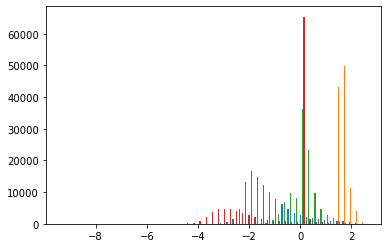

In [9]:
plt.hist(ys, bins=50);